In [19]:
import sys
sys.path.append("src")

from spscml.rk import imex_euler, imex_ssp2

import jax.numpy as jnp
import matplotlib.pyplot as plt
import jax
import scipy

In [47]:
# Solve the equation du^2/dt^2 + gamma * du/dt + f*u = 0
# q = [u, du/dt], dqdt = [du/dt, -f*u - gamma * du/dt]

f = 3.0
gamma = 10

stiff_rhs = lambda q: jnp.array([0., -gamma * q[1]])
nonstiff_rhs = lambda q: jnp.array([q[1], -f*q[0]])

# Solves [u^n+1, du/dt^n+1] = [u^n, du/dt^n - dt/eps*du/dt^n+1]
stiff_implicit_solver = lambda rhs, dt: jnp.array([rhs[0], rhs[1] / (1 + dt*gamma)])

q0 = jnp.array([1.0, 0.0])

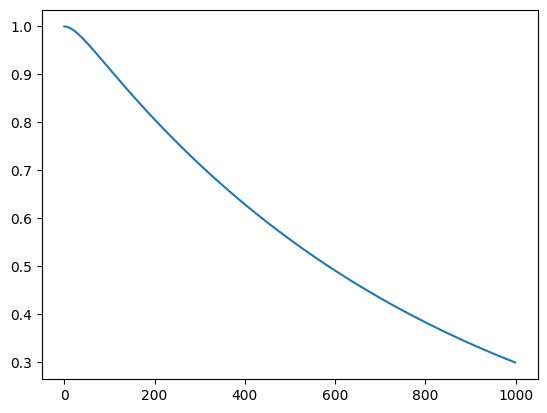

In [48]:
sol = scipy.integrate.solve_ivp(lambda t, q: stiff_rhs(q) + nonstiff_rhs(q), (0., 4.), q0, t_eval=jnp.linspace(0., 4., 1000))
plt.plot(sol.y[0, :])

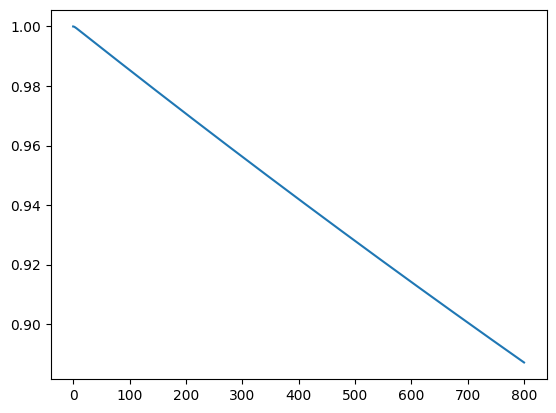

In [44]:
t = 0
dt = 0.005
q = q0
ts = [t]
qs = [q0]
for i in range(800):
    q = imex_ssp2(q, nonstiff_rhs, stiff_rhs, stiff_implicit_solver, dt)
    qs.append(q)
    t += dt

qs = jnp.array(qs)

plt.plot(qs[:, 0])

In [18]:
qs

Array([[ 1.   ,  0.   ],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015],
       [ 1.   , -0.015]], dtype=float32)